## Analysing results

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
folder_path = r"C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order"

In [98]:
traders = ["1 - ZIC", "2 - ZIP", "3 - GDX", "4 - AA",  "5 - GVWY", "6 - SHVR"]
# traders = ["ZIC - 1", "ZIP - 2", "GDX - 3", "AA - 4",  "GVWY - 5", "SHVR - 6"]

column_names = [
    'Trial_Number',
    'Trader_Type_1', 'Total_Profit_1', 'Num_Traders_1', 'Profit_per_trader_1', 'Trades_Per_Trader_1', 'Time_1_1', 'Time_2_1',
    'Trader_Type_2', 'Total_Profit_2', 'Num_Traders_2', 'Profit_per_trader_2', 'Trades_Per_Trader_2', 'Time_1_2', 'Time_2_2'
]

for trader in traders:
    full_folder_path = os.path.join(folder_path, trader)
    result_files = [file for file in os.listdir(full_folder_path) if file.endswith('.csv')]
    
    trader_results = []
    
    for result_file in result_files:
        file_path = os.path.join(full_folder_path, result_file)
        results = pd.read_csv(file_path, header=None)
        trader_results.append(results)
    ttype_results = pd.concat(trader_results, ignore_index=True)
    ttype_results.columns = column_names
    
    output_file = os.path.join(folder_path, f"{trader}.csv")
    ttype_results.to_csv(output_file, index=False)
    

In [107]:
trader_files = [f'1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv', '5 - GVWY.csv', '6 - SHVR.csv']

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    pairwise_test_df = pd.read_csv(file_path)
#     pairwise_test_df = pairwise_test_df[
#         (pairwise_test_df['Total_Profit_1'] != 0) & 
#         (pairwise_test_df['Total_Profit_2'] != 0)
#     ]

    pairwise_test_df['Winner'] = np.where(
        pairwise_test_df['Profit_per_trader_1'] > pairwise_test_df['Profit_per_trader_2'],
        pairwise_test_df['Trader_Type_1'],
        pairwise_test_df['Trader_Type_2']
    )
    
    winner_counts = pairwise_test_df['Winner'].value_counts()

    print(f"Results for {trader_file}:")
    for winner, count in winner_counts.items():
        print(f"'{winner}' occurred {count} times.")
    print()

Results for 1 - ZIC.csv:
' DFBA' occurred 18311 times.
' ZIC' occurred 689 times.

Results for 2 - ZIP.csv:
' ZIP' occurred 10950 times.
' DFBA' occurred 8075 times.

Results for 3 - GDX.csv:
' DFBA' occurred 12305 times.
' GDX' occurred 6695 times.

Results for 4 - AA.csv:
' DFBA' occurred 13839 times.
' AA' occurred 5161 times.

Results for 5 - GVWY.csv:
' GVWY' occurred 12185 times.
' DFBA' occurred 6815 times.

Results for 6 - SHVR.csv:
' DFBA' occurred 11930 times.
' SHVR' occurred 7070 times.



267
37
26
1011
2
78


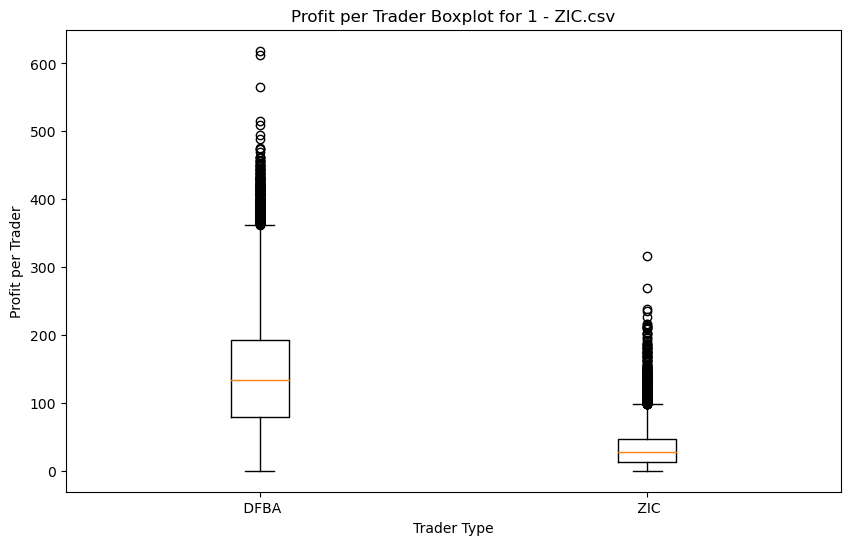

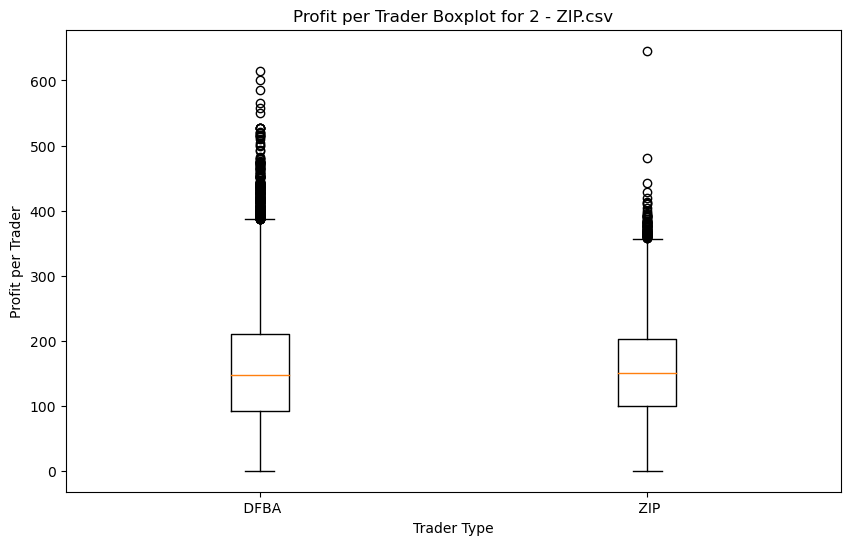

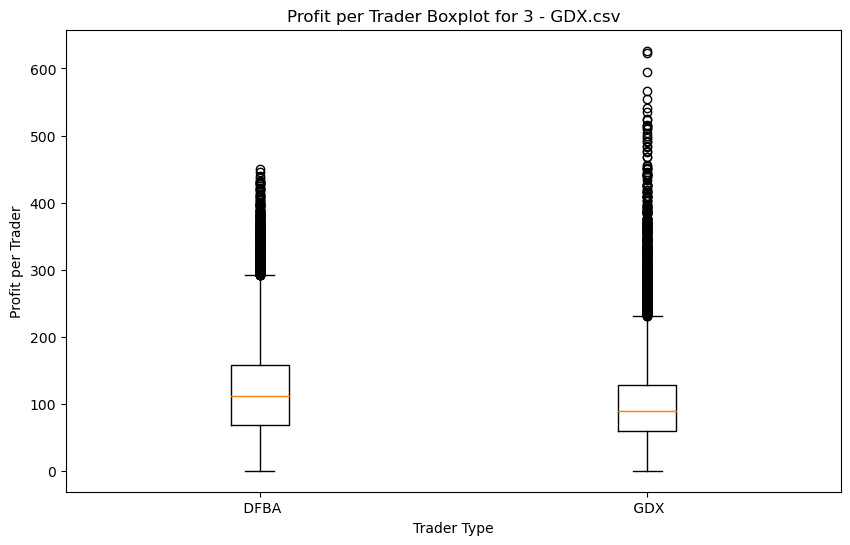

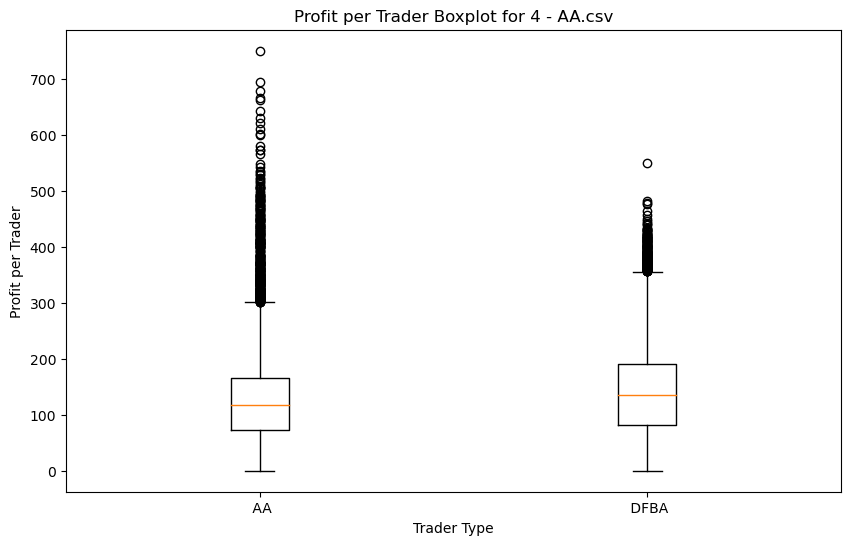

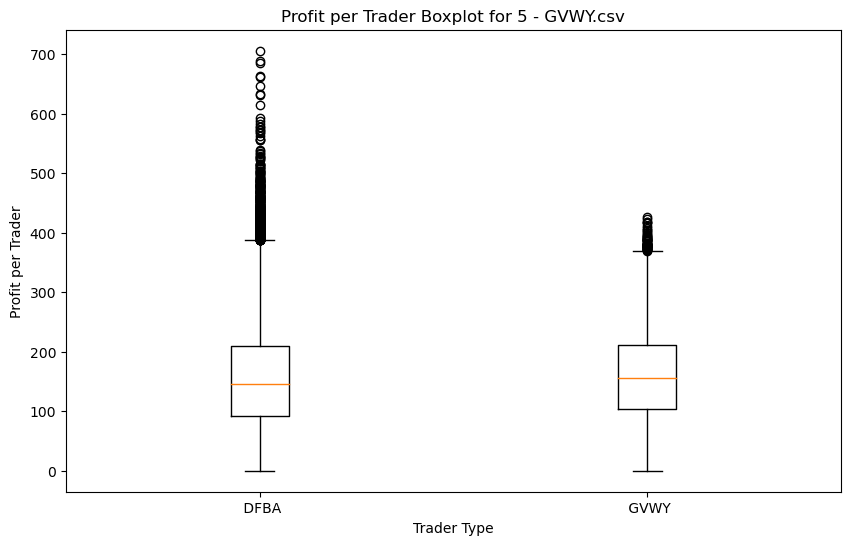

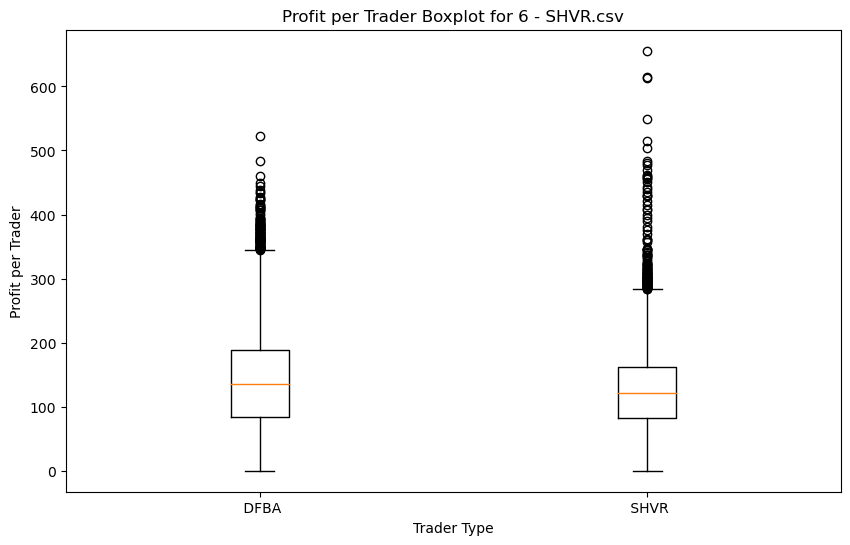

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

trader_files = [f'1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv', '5 - GVWY.csv', '6 - SHVR.csv']

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    df = pd.read_csv(file_path)
    zeros_df = df[
        (df['Total_Profit_1'] == 0) & 
        (df['Total_Profit_2'] == 0)
    ]

    print(len(zeros_df))
    
#     df = df[
#         (df['Total_Profit_1'] != 0) & 
#         (df['Total_Profit_2'] != 0)
#     ]
    

    trader_columns = [col for col in df.columns if 'Trader_Type' in col]
    profit_columns = [col for col in df.columns if 'Profit_per_trader' in col]
    
    data = []
    labels = []
    
    for trader_col, profit_col in zip(trader_columns, profit_columns):
        data.append(df[profit_col])
        labels.append(df[trader_col].iloc[0])

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels)

    plt.title(f'Profit per Trader Boxplot for {trader_file}')
    plt.xlabel('Trader Type')
    plt.ylabel('Profit per Trader')
    

In [41]:
zeros_df = df[
        (df['Total_Profit_1'] == 0) & 
        (df['Total_Profit_2'] == 0)
    ]

len(zeros_df)

78

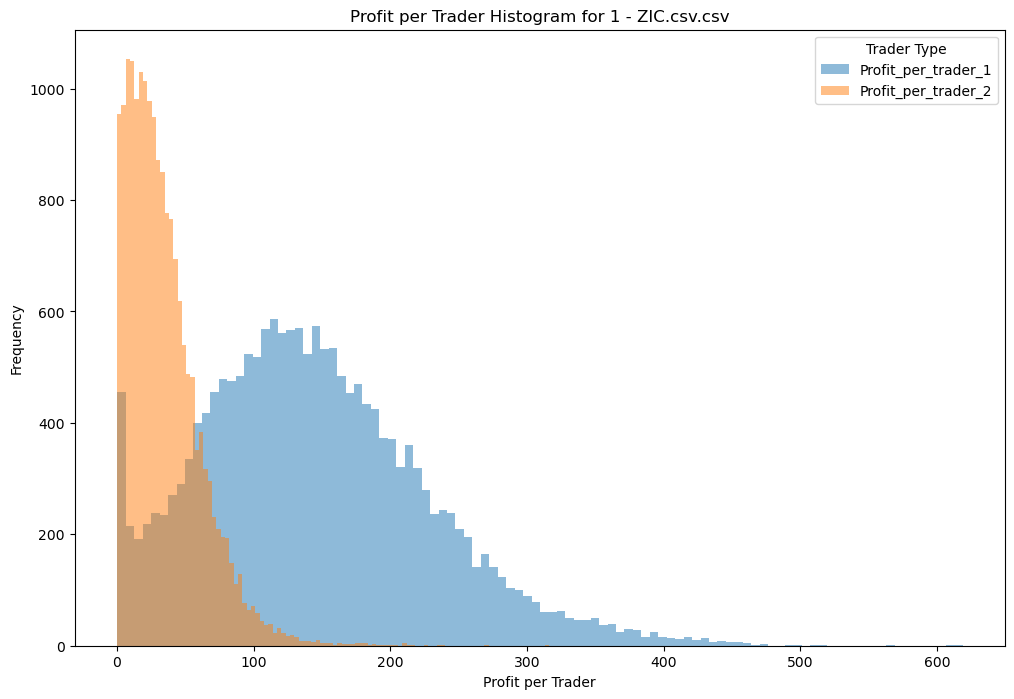

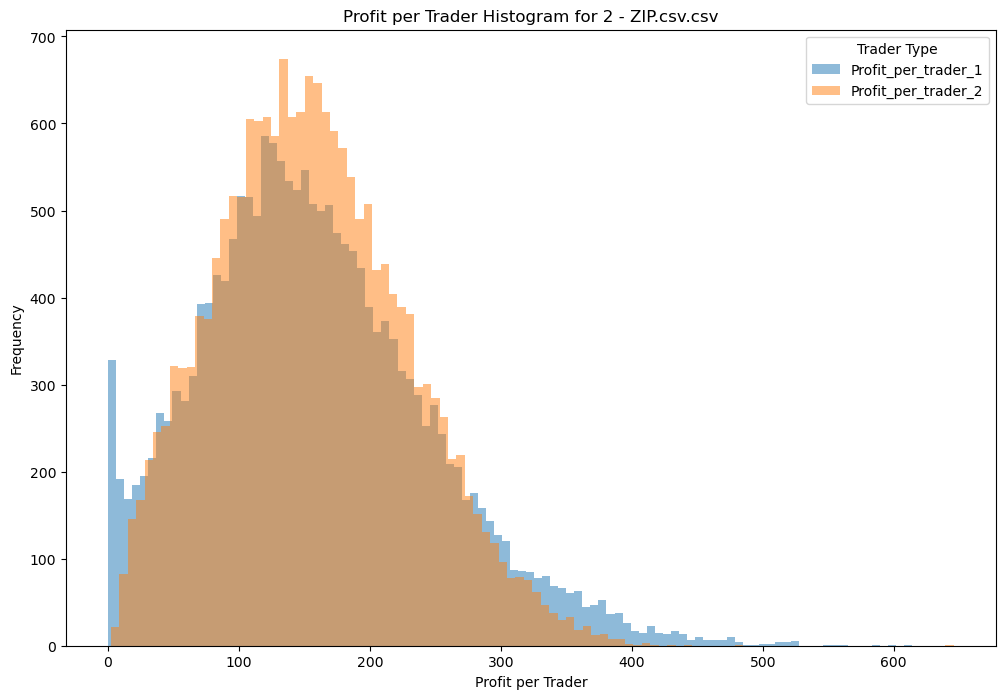

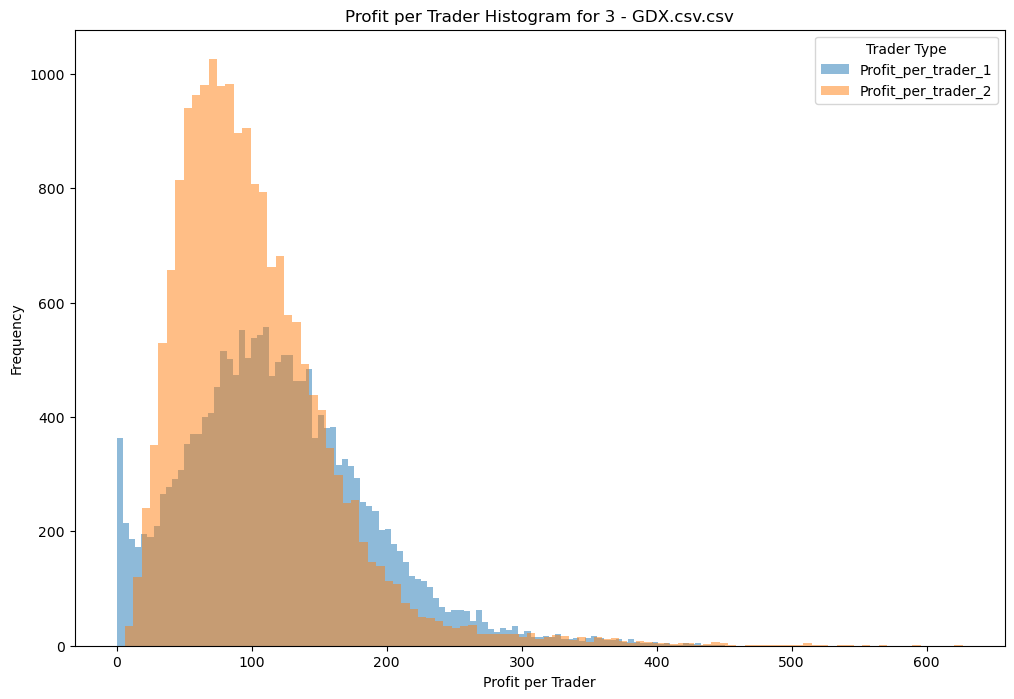

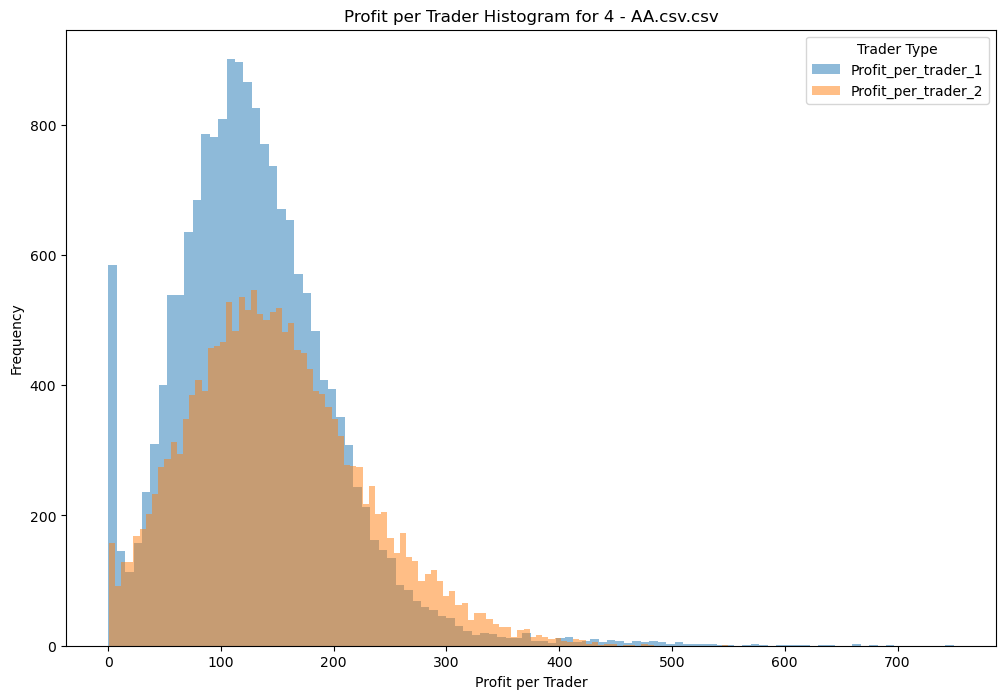

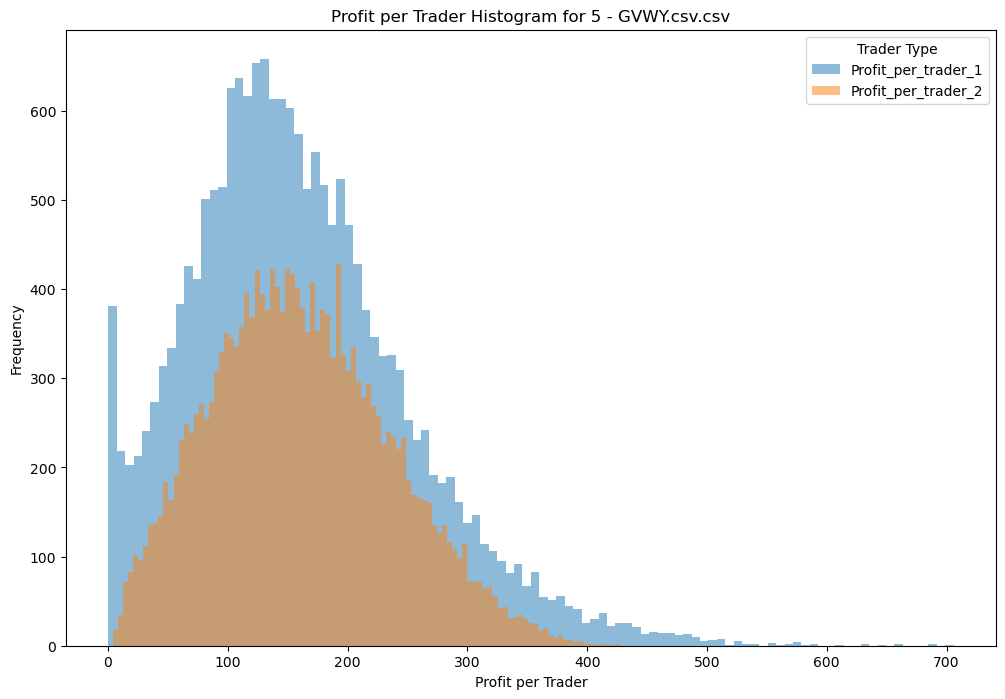

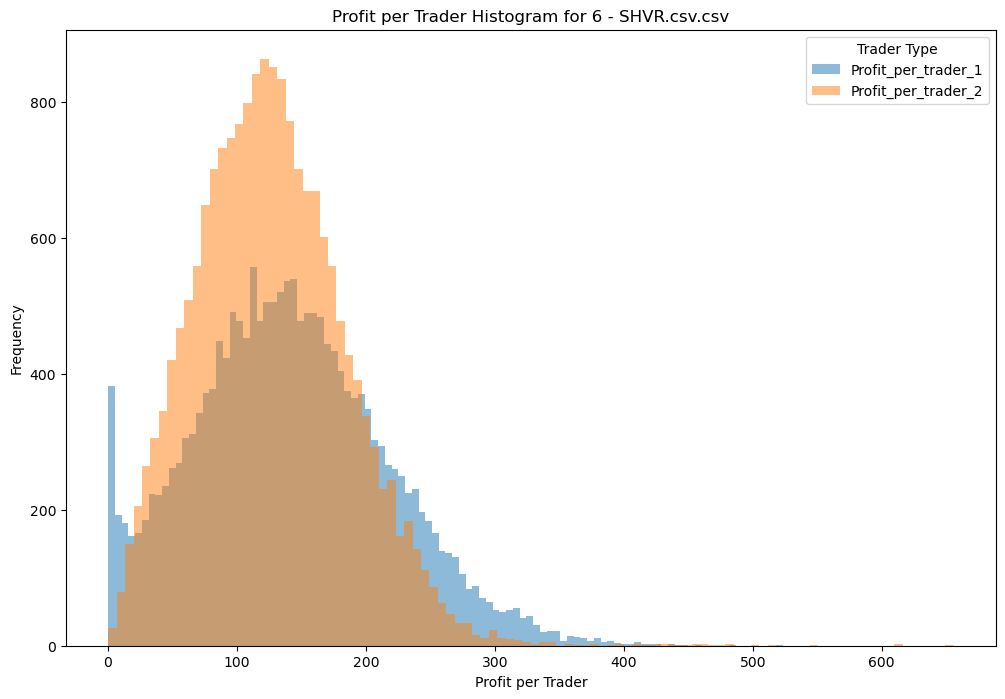

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order\2 - ZIP.csv'
for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    df = pd.read_csv(file_path)

    df = df[
            (df['Total_Profit_1'] != 0) & 
            (df['Total_Profit_2'] != 0)
        ]

    profit_columns = [col for col in df.columns if 'Profit_per_trader' in col]

    plt.figure(figsize=(12, 8))

    for profit_col in profit_columns:
        plt.hist(df[profit_col], bins=100, alpha=0.5, label=profit_col)

    plt.title(f'Profit per Trader Histogram for {trader_file}.csv')
    plt.xlabel('Profit per Trader')
    plt.ylabel('Frequency')
    plt.legend(title='Trader Type')

    plt.show()



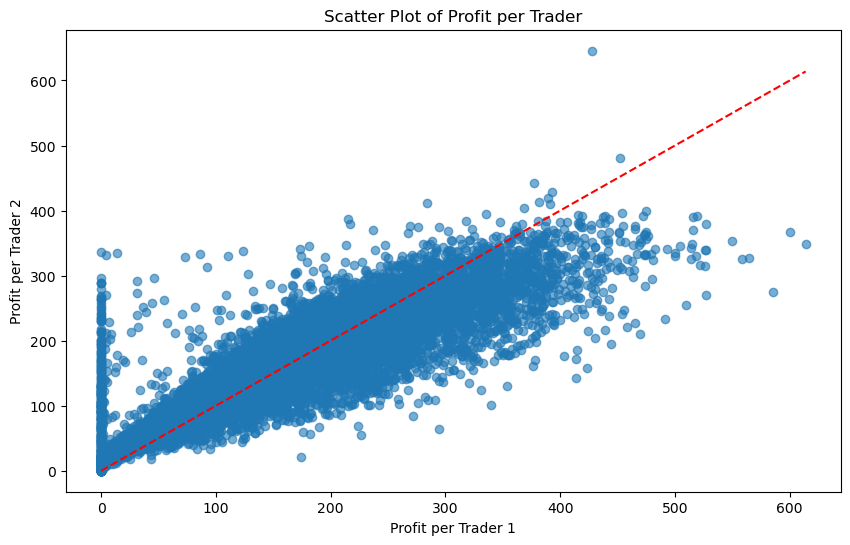

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order\2 - ZIP.csv')

# df = df[
#         (df['Profit_per_trader_1'] >= 1) & 
#         (df['Profit_per_trader_2'] >= 1)
#     ]


plt.figure(figsize=(10, 6))
plt.scatter(df['Profit_per_trader_1'], df['Profit_per_trader_2'], alpha=0.6)
plt.plot([df['Profit_per_trader_1'].min(), df['Profit_per_trader_1'].max()],
         [df['Profit_per_trader_1'].min(), df['Profit_per_trader_1'].max()],
         color='red', linestyle='--')
plt.xlabel('Profit per Trader 1')
plt.ylabel('Profit per Trader 2')
plt.title('Scatter Plot of Profit per Trader')
plt.show()

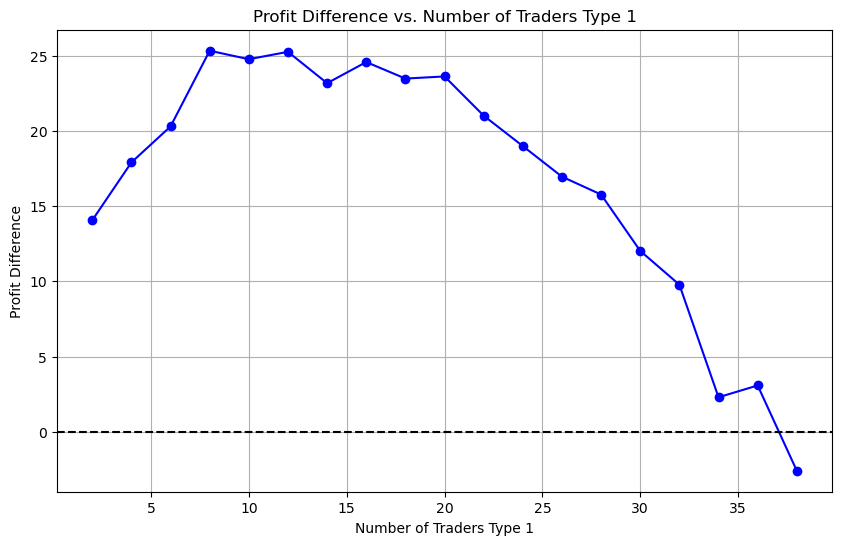

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order\3 - GDX.csv')

df['Profit_Difference'] = df['Profit_per_trader_1'] - df['Profit_per_trader_2']

grouped = df.groupby('Num_Traders_1')['Profit_Difference'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Number of Traders Type 1')
plt.ylabel('Profit Difference')
plt.title('Profit Difference vs. Number of Traders Type 1')
plt.grid(True)
plt.show()


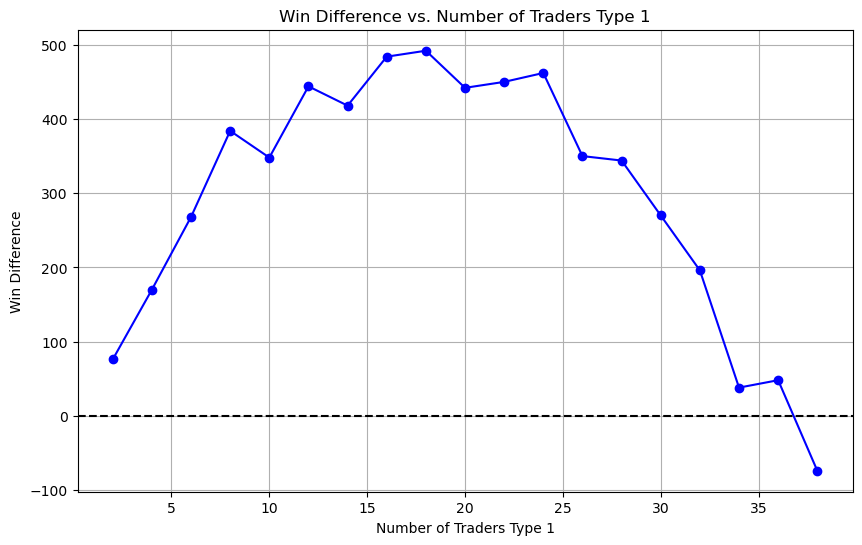

In [92]:
df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order\3 - GDX.csv')

df['Winner'] = np.where(df['Profit_per_trader_1'] > df['Profit_per_trader_2'], df['Trader_Type_1'], df['Trader_Type_2'])

win_counts = df.groupby(['Num_Traders_1', 'Winner']).size().unstack(fill_value=0)

win_counts['Win_Difference'] = win_counts.iloc[:, 0] - win_counts.iloc[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(win_counts.index, win_counts['Win_Difference'], marker='o', linestyle='-', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Number of Traders Type 1')
plt.ylabel('Win Difference')
plt.title('Win Difference vs. Number of Traders Type 1')
plt.grid(True)
plt.show()


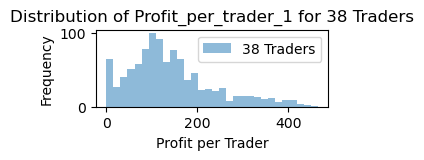

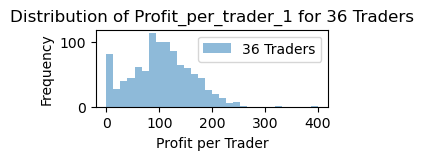

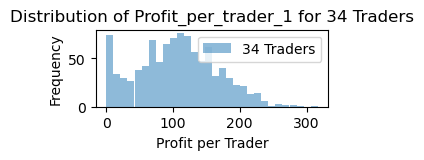

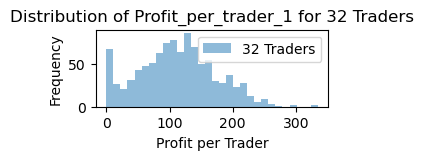

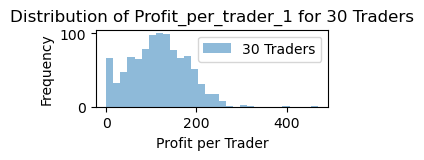

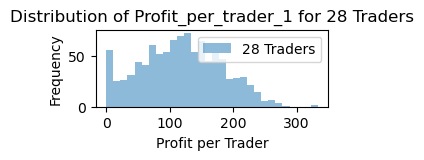

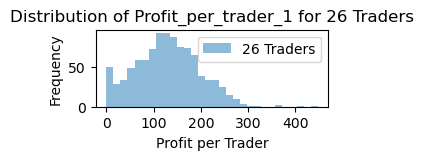

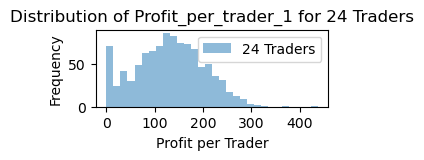

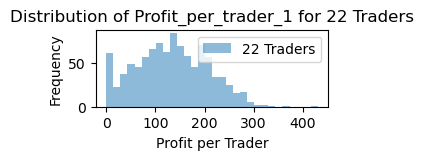

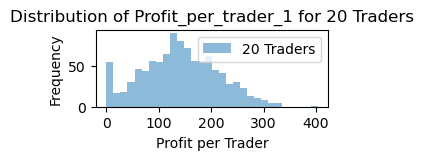

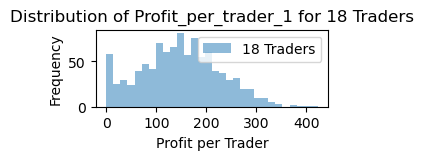

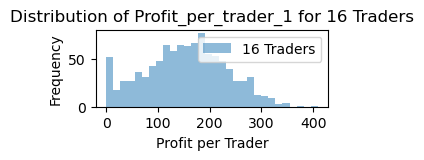

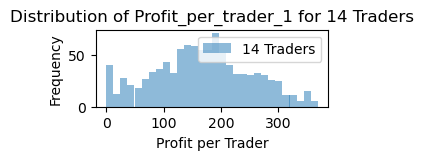

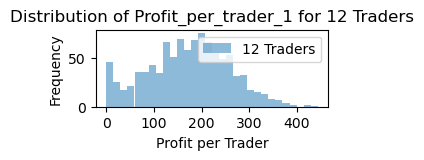

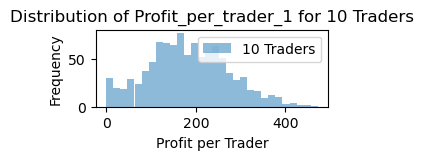

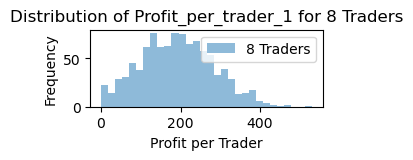

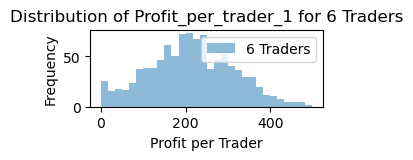

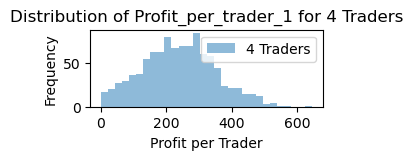

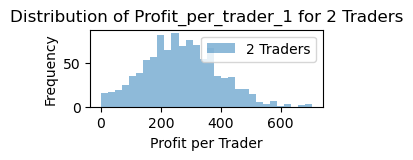

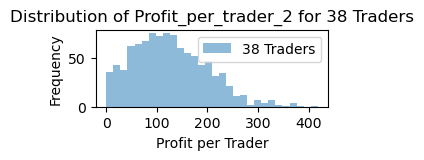

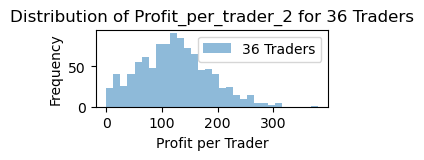

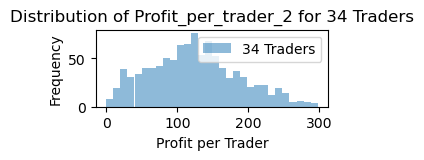

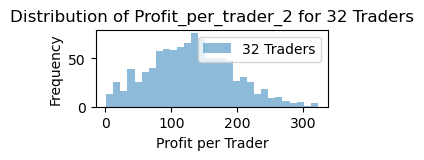

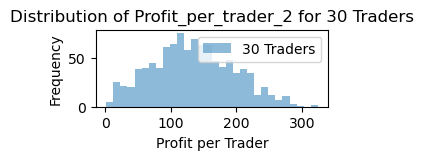

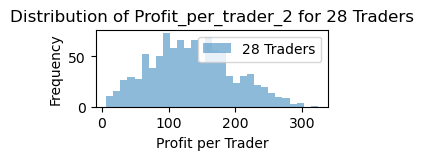

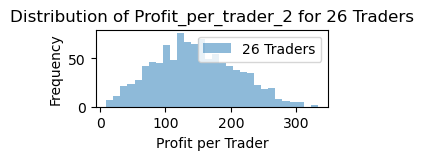

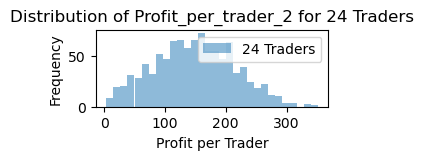

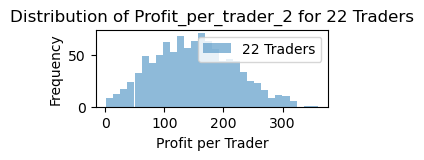

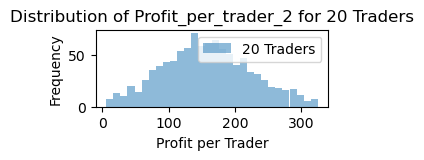

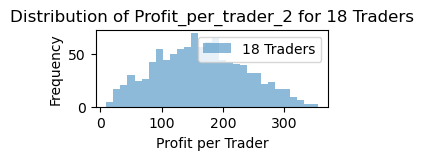

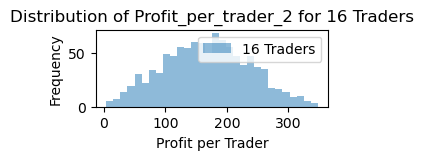

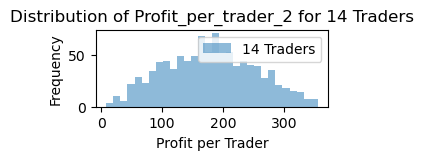

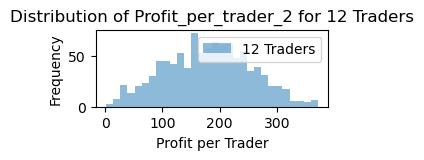

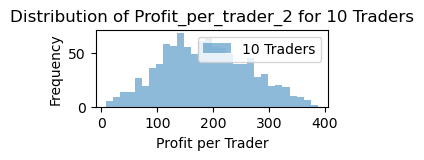

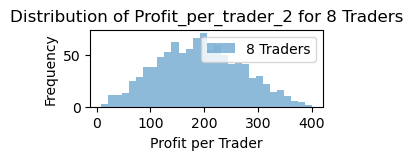

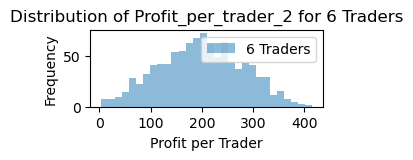

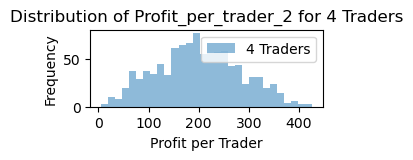

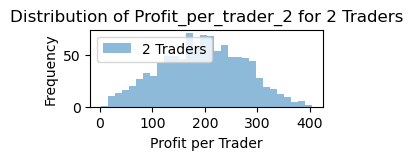

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order\5 - GVWY.csv')

trader_types = ['Profit_per_trader_1', 'Profit_per_trader_2']

for trader_type in trader_types:
    for n in df['Num_Traders_1'].unique():
        plt.figure(figsize=(3, 1))
        subset = df[df['Num_Traders_1'] == n]
        plt.hist(subset[trader_type], bins=30, alpha=0.5, label=f'{n} Traders')
        plt.title(f'Distribution of {trader_type} for {n} Traders')
        plt.xlabel('Profit per Trader')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

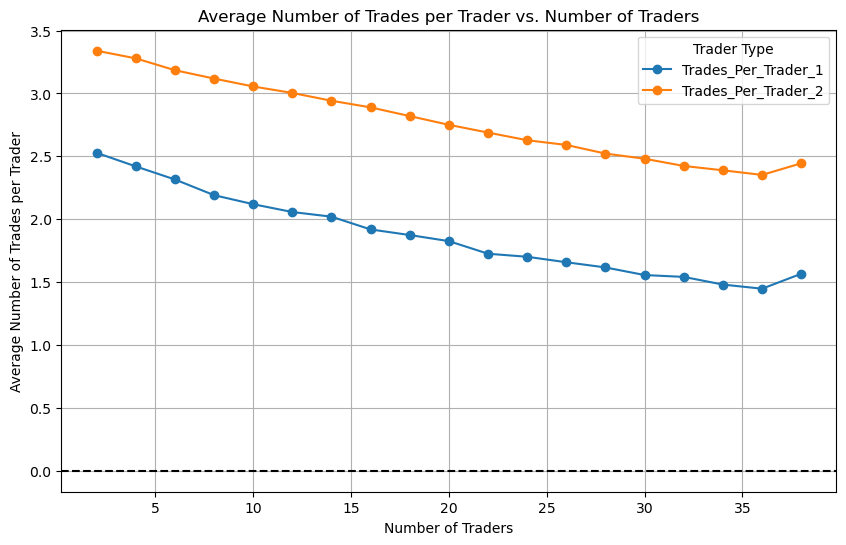

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 120sec customer order\5 - GVWY.csv')

trade_columns = ['Trades_Per_Trader_1', 'Trades_Per_Trader_2']

plt.figure(figsize=(10, 6))

for trade_col in trade_columns:
    grouped = df.groupby('Num_Traders_1')[trade_col].mean()
    plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', label=trade_col)

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Number of Traders')
plt.ylabel('Average Number of Trades per Trader')
plt.title('Average Number of Trades per Trader vs. Number of Traders')
plt.legend(title='Trader Type')
plt.grid(True)
plt.show()


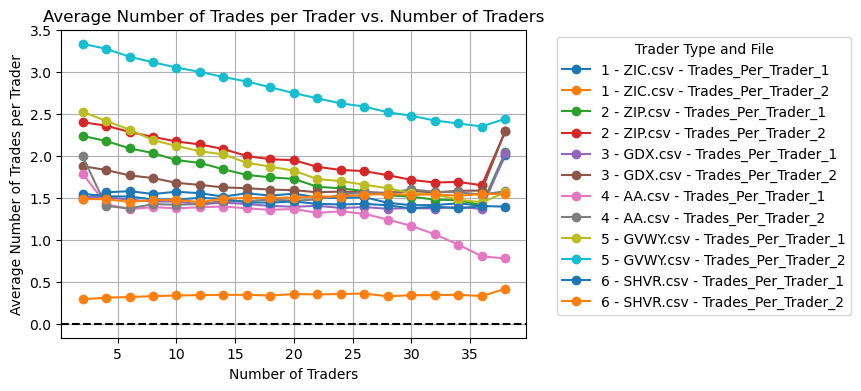

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import os
folder_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 120sec customer order'
trader_files = ['1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv', '5 - GVWY.csv', '6 - SHVR.csv']

plt.figure(figsize=(6, 4))

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    df = pd.read_csv(file_path)
    
    trade_columns = ['Trades_Per_Trader_1', 'Trades_Per_Trader_2']
    
    for trade_col in trade_columns:
        grouped = df.groupby('Num_Traders_1')[trade_col].mean()
        plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', label=f'{trader_file} - {trade_col}')
        
plt.axhline(0, color='black', linestyle='--')

plt.xlabel('Number of Traders')
plt.ylabel('Average Number of Trades per Trader')
plt.title('Average Number of Trades per Trader vs. Number of Traders')
plt.legend(title='Trader Type and File', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()
